<a href="https://colab.research.google.com/github/hoagn-vu/SNN-Face-Recognition/blob/main/Project_AI_CuoiKy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.Set up



## 1.1. Cài đặt thư viện phụ thuộc


In [3]:
!pip install numpy>=1.25.0


In [4]:
!pip install tensorflow==2.12.0 tensorflow-cpu==2.12.0 opencv-python matplotlib

## 1.2.Tải thư viện


In [5]:
import cv2
import os
import random
import numpy as np
from matplotlib import pyplot as plt

In [6]:
# Import tensorflow dependencies - Functional API
!pip install matplotlib-venn
from tensorflow.keras.models import Model
from tensorflow.keras.layers  import Layer, Conv2D, Dense, MaxPooling2D, Input, Flatten
import tensorflow as tf

## 1.3.Khởi tạo GPU Growth

In [7]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

## 1.4.Tạo Folder

In [8]:
!git clone https://github.com/hoagn-vu/test-colab.git

Cloning into 'test-colab'...
remote: Enumerating objects: 13984, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 13984 (delta 0), reused 6 (delta 0), pack-reused 13976
Receiving objects: 100% (13984/13984), 192.36 MiB | 16.85 MiB/s, done.
Updating files: 100% (13976/13976), done.


In [9]:
# Đường dẫn đến thư mục chứa ảnh đã clone từ GitHub
POS_PATH = '/content/test-colab/positive'
NEG_PATH = '/content/test-colab/negative'
ANC_PATH = '/content/test-colab/anchor'

In [10]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# Liệt kê tất cả các file trong thư mục ảnh
image_files = [f for f in os.listdir(POS_PATH) if os.path.isfile(os.path.join(POS_PATH, f))]

# Duyệt qua từng tệp ảnh trong danh sách và nối chúng với đường dẫn thư mục
for file_name in image_files:
    full_path = os.path.join(ANC_PATH, file_name)
    print(full_path)

/content/test-colab/anchor/4ab69ede-0987-11ef-857c-ecee15d3d43b.jpg
/content/test-colab/anchor/48edf0fb-0987-11ef-a33c-ecee15d3d43b.jpg
/content/test-colab/anchor/8e67733f-0986-11ef-a49d-ecee15d3d43b.jpg
/content/test-colab/anchor/54b2ab76-0987-11ef-922b-ecee15d3d43b.jpg
/content/test-colab/anchor/475d9484-0987-11ef-b619-ecee15d3d43b.jpg
/content/test-colab/anchor/8ecdc2d8-0986-11ef-920f-ecee15d3d43b.jpg
/content/test-colab/anchor/4c4152aa-0987-11ef-9ce3-ecee15d3d43b.jpg
/content/test-colab/anchor/5ad41108-0987-11ef-a7aa-ecee15d3d43b.jpg
/content/test-colab/anchor/48d134a1-0987-11ef-a427-ecee15d3d43b.jpg
/content/test-colab/anchor/4b3b96af-0987-11ef-9487-ecee15d3d43b.jpg
/content/test-colab/anchor/89e50527-0986-11ef-bfb3-ecee15d3d43b.jpg
/content/test-colab/anchor/54ebec97-0987-11ef-be9e-ecee15d3d43b.jpg
/content/test-colab/anchor/565c82d3-0987-11ef-96b2-ecee15d3d43b.jpg
/content/test-colab/anchor/4698f958-0987-11ef-9d99-ecee15d3d43b.jpg
/content/test-colab/anchor/53ffbd9f-0987-11ef-a1

In [ ]:
# Khởi tạo đường dẫn
# POS_PATH = os.path.join('data', 'positive')
# NEG_PATH = os.path.join('data', 'negative')
# ANC_PATH = os.path.join('data', 'anchor')

In [ ]:
# Tạo folder
# os.makedirs(POS_PATH)
# os.makedirs(NEG_PATH)
# os.makedirs(ANC_PATH)

# 2.Tạo file ảnh Positives và Anchors

## 2.1

In [11]:
# for directory in os.listdir('lfw'):
#   for file in os.listdir(os.path.join('lfw', directory)):
#     EX_PATH = os.path.join('lfw', directory, file)
#     NEW_PATH = os.path.join(NEG_PATH, file)
#     os.replace(EX_PATH, NEW_PATH)

## 2.2.Tạo Positive và Anchor

In [12]:
# import uuid

In [13]:
# uuid.uuid1()

In [14]:
# import cv2
# cap = cv2.VideoCapture(0)
# while cap.isOpened():
#   ret, frame = cap.read()

#   frame = frame[120:120+250,200:200+250,:]

#   if cv2.waitKey(1) & 0XFF == ord('a'):
#     imgname = os.path.join(ANC_PATH, '{}.jpg'.format(uuid.uuid1()))
#     cv2.imwrite(imgname, frame)


#   if cv2.waitKey(1) & 0XFF == ord('p'):
#     imgname = os.path.join(POS_PATH, '{}.jpg'.format(uuid.uuid1()))
#     cv2.imwrite(imgname, frame)


#   cv2.imshow('Image Collection', frame)

#   if cv2.waitKey(1) & 0XFF == ord('q'):
#     break

# cap.release()

# cv2.destroyAllWindows()

# 2X. Data Augmentation

In [16]:
# def data_aug(img):
#     data = []
#     for i in range(9):
#         img = tf.image.stateless_random_brightness(img, max_delta=0.02, seed=(1,2))
#         img = tf.image.stateless_random_contrast(img, lower=0.6, upper=1, seed=(1,3))
#         # img = tf.image.stateless_random_crop(img, size=(20,20,3), seed=(1,2))
#         img = tf.image.stateless_random_flip_left_right(img, seed=(np.random.randint(100),np.random.randint(100)))
#         img = tf.image.stateless_random_jpeg_quality(img, min_jpeg_quality=90, max_jpeg_quality=100, seed=(np.random.randint(100),np.random.randint(100)))
#         img = tf.image.stateless_random_saturation(img, lower=0.9,upper=1, seed=(np.random.randint(100),np.random.randint(100)))

#         data.append(img)

#     return data

In [17]:
import os
import uuid

In [18]:
# img_path = os.path.join(ANC_PATH, '924e839c-135f-11ec-b54e-a0cec8d2d278.jpg')
# img = cv2.imread(img_path)
# augmented_images = data_aug(img)

# for image in augmented_images:
#     cv2.imwrite(os.path.join(ANC_PATH, '{}.jpg'.format(uuid.uuid1())), image.numpy())

In [19]:
# for file_name in os.listdir(os.path.join(POS_PATH)):
#     img_path = os.path.join(POS_PATH, file_name)
#     img = cv2.imread(img_path)
#     augmented_images = data_aug(img)

#     for image in augmented_images:
#         cv2.imwrite(os.path.join(POS_PATH, '{}.jpg'.format(uuid.uuid1())), image.numpy())

# 3. Tiền xử lí hình ảnh

## 3.1.Lấy đường dẫn thư mục hình ảnh

In [20]:
anchor = tf.data.Dataset.list_files(ANC_PATH+'/*.jpg').take(250)
positive = tf.data.Dataset.list_files(POS_PATH+'/*.jpg').take(250)
negative = tf.data.Dataset.list_files(NEG_PATH+'/*.jpg').take(250)

In [21]:
dir_test = anchor.as_numpy_iterator()

In [22]:
print(dir_test.next())

b'/content/test-colab/anchor/0ffd334d-0988-11ef-829a-ecee15d3d43b.jpg'


## 3.2.Tiền xử lí dữ liệu ( Resize & Scale )

In [23]:
def preprocess(file_path):

    # Tải hình ảnh từ đường dẫn
    byte_img = tf.io.read_file(file_path)

    # Tải hình ảnh
    img = tf.io.decode_jpeg(byte_img)

    # Chỉnh size ảnh thành 100x100
    img = tf.image.resize(img, (100, 100))

    # Scale hình ảnh về trong khoarg 0 và 1
    img = img / 255.0

    return img

In [24]:
img = preprocess('/content/test-colab/anchor/13fceeb6-0988-11ef-9668-ecee15d3d43b.jpg')

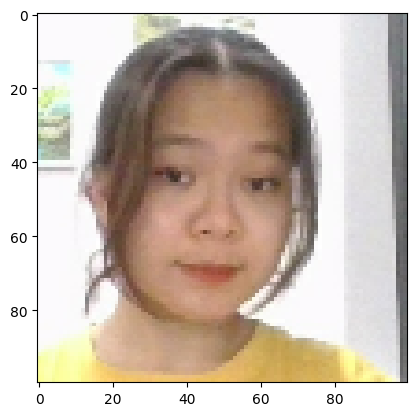

In [25]:
plt.imshow(img)

In [39]:
anchor.map(preprocess)
negative.map(preprocess)
positive.map(preprocess)

<_MapDataset element_spec=TensorSpec(shape=(100, 100, None), dtype=tf.float32, name=None)>

## 3.3 Gán nhãn dataset

In [27]:
# (anchor, positive) => 1,1,1,1,1
# (anchor, negative) => 0,0,0,0,0

In [28]:
positives = tf.data.Dataset.zip((anchor, positive, tf.data.Dataset.from_tensor_slices(tf.ones(len(anchor)))))
negatives = tf.data.Dataset.zip((anchor, negative, tf.data.Dataset.from_tensor_slices(tf.zeros(len(anchor)))))
data = positives.concatenate(negatives)

In [29]:
samples = data.as_numpy_iterator()

In [30]:
exampple = samples.next()

In [31]:
exampple

(b'/content/test-colab/anchor/16b553a7-0988-11ef-8464-ecee15d3d43b.jpg',
 b'/content/test-colab/positive/8aee672a-0986-11ef-af99-ecee15d3d43b.jpg',
 1.0)

## 3.4 Xây dựng phân vùng huấn luyện và thử nghiệm

In [32]:
def preprocess_twin(input_img, validation_img, label):
    return(preprocess(input_img), preprocess(validation_img), label)

In [33]:
res = preprocess_twin(*exampple)

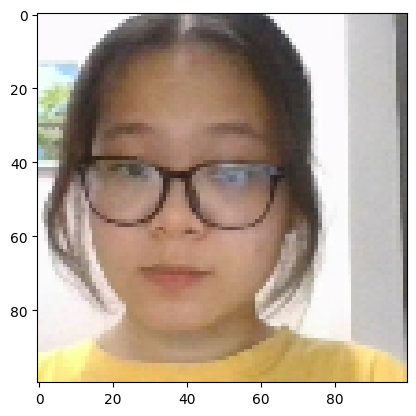

In [34]:
plt.imshow(res[1])

In [35]:
res[2]

1.0

In [36]:
# Build dataloader pipeline
data = data.map(preprocess_twin)
data = data.cache()
data = data.shuffle(buffer_size=10000)

In [37]:
# Training partition
train_data = data.take(round(len(data)*.7))
train_data = train_data.batch(16)
train_data = train_data.prefetch(8)

In [38]:
# Testing partition
test_data = data.skip(round(len(data)*.7))
test_data = test_data.take(round(len(data)*.3))
test_data = test_data.batch(16)
test_data = test_data.prefetch(8)